# Nomes Predicativos com Emoções

In [ ]:
! pip install conllu

In [ ]:
import numpy as np
import pandas as pd
import conllu as c

## Data

In [ ]:
# dados dos tweets com os eixos emocionais
dante_emot = pd.read_csv('tweets_stocks.csv')

In [ ]:
dante_emot.head()

,tweet_id,text,TRU,DIS,JOY,SAD,ANT,SUR,ANG,FEA,NEUTRAL,conf_tru_dis,conf_joy_sad,conf_ant_sur,conf_ang_fea,num_annot
0,446333972562591745l,enquanto isso #lame4 rs,0,0,-1,-1,0,0,0,0,-1,0.667,0.667,0.667,0.667,3
1,446341582183464960l,"PETR4 subiu na bolsa 13,50. Muito bem, surpres...",1,0,1,0,0,1,0,0,0,0.667,1.000,0.667,1.000,3
2,443844230512144385l,$LREN3 - Lojas Renner (lren-nm) - Ago - 17/04/...,0,0,0,0,0,0,0,0,1,1.000,1.000,1.000,1.000,3
3,448105739962548224l,"vai, oibr4. um troux... ops... investidor prec...",0,1,0,1,0,0,1,0,0,0.667,0.667,0.667,0.667,3
4,446250331123773440l,$LREN3 - Lojas Renner (lren-nm) - Declaracao E...,0,0,0,0,-1,-1,-2,-2,-1,0.667,0.667,0.667,0.333,3


In [ ]:
# dados dos nomes predicativos que o Bryan achou
# dante_npreds = pd.read_excel('tweets_nomes_tratados.xlsx', sheet_name='Sem_Foco')

In [ ]:
# dante_npreds.head()

In [ ]:
# conjunto de todos os tweets
dante_npreds_conllu = open('tweets_npreds.conllu', "r", encoding="utf-8")

In [ ]:
dante_npreds_parsed = dante_npreds_conllu.read()

In [ ]:
dante_npreds_conllu.close()

In [ ]:
dante_npreds_parsed = c.parse(dante_npreds_parsed)

In [ ]:
dante_npreds = {'tweet_ids': [], 'text': []}

for i in range(len(dante_npreds_parsed)):
  dante_npreds['tweet_ids'].append(dante_npreds_parsed[i].metadata['sent_id'].split('01_')[1])
  dante_npreds['text'].append(dante_npreds_parsed[i].metadata['text'].strip())

In [ ]:
dante_npreds = pd.DataFrame(dante_npreds)

In [ ]:
# conjunto de todos os tweets
data = open('DANTEStocks (15dez2022).conllu', "r", encoding="utf-8")

In [ ]:
annotations = data.read()
data.close()

In [ ]:
sentences = c.parse(annotations)

## Organizando as Bases de Dados

In [ ]:
# criando uma lista de todos os tweets
tweets = []
for i in range(len(sentences)):
    tweet = sentences[i].metadata['text'].strip()
    tweets.append(tweet)

In [ ]:
len(tweets)

4048

In [ ]:
# verificando se os tweets correspondem ao id em dante_npreds
dante_npreds.iloc[300, :]

tweet_ids                                  445912636501532672l
text         Antecipamos aqui que ITUB4 passaria PETR4 em p...
Name: 300, dtype: object

In [ ]:
tweets[1670]

'de olho em OIBR4'

In [ ]:
# Vendo se da certo fazer um merge
dante_npreds.shape

(1401, 2)

In [ ]:
dante_emot.shape

(4517, 16)

In [ ]:
npreds_emot = dante_npreds.merge(dante_emot, how='left', left_on='tweet_ids', right_on='tweet_id')

In [ ]:
npreds_emot.drop(['text_y', 'tweet_id'], axis=1, inplace=True)

In [ ]:
npreds_emot.head()

,tweet_ids,text_x,TRU,DIS,JOY,SAD,ANT,SUR,ANG,FEA,NEUTRAL,conf_tru_dis,conf_joy_sad,conf_ant_sur,conf_ang_fea,num_annot
0,441058259676303361l,Fevereiro 2014: Ainda não é o momento de entra...,0,0,0,0,1,0,0,0,0,0.667,0.667,0.667,1.000,3
1,441060770843852800l,Ouro: AEDU3 Fusão só depende do CADE em jun/14...,-2,-2,1,0,1,0,-2,-2,-1,0.333,0.667,0.667,0.333,3
2,441195166905290753l,"Papeis que negociaram mais taxas #KROT3, #OIBR...",-2,-2,-1,-1,1,0,-2,-2,-1,0.333,0.667,0.667,0.333,3
3,441209778648653824l,$PETR3 - Petrobras (petr) -candidatos Indicado...,0,0,0,0,0,0,0,0,1,1.000,1.000,1.000,1.000,3
4,441215300357586944l,$PETR3 - Petrobras ( petr ) - Candidatos Ind. ...,0,0,0,0,0,0,0,0,1,0.667,0.667,0.667,0.667,3


In [ ]:
# Observando os duplicados
npreds_emot.loc[npreds_emot.duplicated(keep=False)]

,tweet_ids,text_x,TRU,DIS,JOY,SAD,ANT,SUR,ANG,FEA,NEUTRAL,conf_tru_dis,conf_joy_sad,conf_ant_sur,conf_ang_fea,num_annot


In [ ]:
np.random.seed(1234)
sample_random_dist = np.random.choice([i for i in range(500)], 9, replace=True)
sample_random_dist

array([303, 211, 294,  53, 204, 372, 152, 143, 177])

In [ ]:
sample_random_dist_rel = sample_random_dist/npreds_emot.shape[0]
sample_random_dist_rel

array([0.21627409, 0.15060671, 0.20985011, 0.03783012, 0.14561028,
       0.26552463, 0.10849393, 0.10206995, 0.12633833])

In [ ]:
emot_dims_npreds = np.zeros(9)
for i in range(npreds_emot.shape[0]):
  for j in range(9):
    if npreds_emot.iloc[i, j+4] == 1:
      emot_dims_npreds[j] += 1

In [ ]:
emot_dims_npreds

array([152., 125., 240., 148.,  50.,  80., 248., 206., 291.])

In [ ]:
emot_dims_npreds_rel = emot_dims_npreds/npreds_emot.shape[0]
emot_dims_npreds_rel

array([0.10849393, 0.08922198, 0.17130621, 0.10563883, 0.03568879,
       0.05710207, 0.17701642, 0.14703783, 0.20770878])

In [ ]:
dante_emot

,tweet_id,text,TRU,DIS,JOY,SAD,ANT,SUR,ANG,FEA,NEUTRAL,conf_tru_dis,conf_joy_sad,conf_ant_sur,conf_ang_fea,num_annot
0,446333972562591745l,enquanto isso #lame4 rs,0,0,-1,-1,0,0,0,0,-1,0.667,0.667,0.667,0.667,3
1,446341582183464960l,"PETR4 subiu na bolsa 13,50. Muito bem, surpres...",1,0,1,0,0,1,0,0,0,0.667,1.000,0.667,1.000,3
2,443844230512144385l,$LREN3 - Lojas Renner (lren-nm) - Ago - 17/04/...,0,0,0,0,0,0,0,0,1,1.000,1.000,1.000,1.000,3
3,448105739962548224l,"vai, oibr4. um troux... ops... investidor prec...",0,1,0,1,0,0,1,0,0,0.667,0.667,0.667,0.667,3
4,446250331123773440l,$LREN3 - Lojas Renner (lren-nm) - Declaracao E...,0,0,0,0,-1,-1,-2,-2,-1,0.667,0.667,0.667,0.333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,456788707576532992l,$EMBR3 - Embraer (embr-nm) - Aviso Aos Acionis...,0,0,0,0,1,0,0,0,0,0.667,0.667,0.667,0.667,3
4513,458688220092715008l,ABEV3: Oportunidade de compra (+ de 20% de alt...,1,0,0,0,1,0,0,0,0,0.667,0.667,0.667,0.667,3
4514,444219554114195457l,BBAS3_Mensal !!! Alguém tem algum recado para ...,0,1,-2,-2,-2,-2,0,0,-1,0.667,0.333,0.333,0.667,3
4515,451468663569141760l,"Bradesco PN (BBDC4), Gráfico Semanal. Estudo t...",0,0,0,0,0,0,0,0,1,0.667,1.000,1.000,1.000,3


In [ ]:
sum(dante_emot['tweet_id'].duplicated())

0

In [ ]:
j = 0

# checking all npreds in dante_emot
for i in range(dante_emot.shape[0]):
  if dante_emot['tweet_id'][i] in npreds_emot.tweet_ids.to_list():
    j+=1

print(j)

1401


In [ ]:
not_npreds_ids = [id for id in dante_emot['tweet_id'] if id not in npreds_emot.tweet_ids.to_list()]

In [ ]:
print(len(not_npreds_ids))
print(len(np.unique(npreds_emot.tweet_ids.to_list())))
print(len(np.unique(npreds_emot.tweet_ids.to_list())) + len(not_npreds_ids))
print(dante_emot.shape[0])

3116
1401
4517
4517


In [ ]:
dante_emot_nonpred = dante_emot.loc[dante_emot['tweet_id'].isin(not_npreds_ids), :]
dante_emot_nonpred.shape

(3116, 16)

In [ ]:
emot_dims_corpus = np.zeros(9)
for i in range(dante_emot_nonpred.shape[0]):
  for j in range(9):
    if dante_emot_nonpred.iloc[i, j+2] == 1:
      emot_dims_corpus[j] += 1

In [ ]:
emot_dims_corpus

array([564., 536., 379., 312., 416., 348., 206., 152., 531.])

In [ ]:
emot_dims_corpus_rel = emot_dims_corpus / dante_emot_nonpred.shape[0]
emot_dims_corpus_rel

array([0.18100128, 0.1720154 , 0.1216303 , 0.10012837, 0.13350449,
       0.11168164, 0.0661104 , 0.04878049, 0.17041078])

In [ ]:
colnames = dante_emot.columns[2:11]
colnames

Index(['TRU', 'DIS', 'JOY', 'SAD', 'ANT', 'SUR', 'ANG', 'FEA', 'NEUTRAL'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt

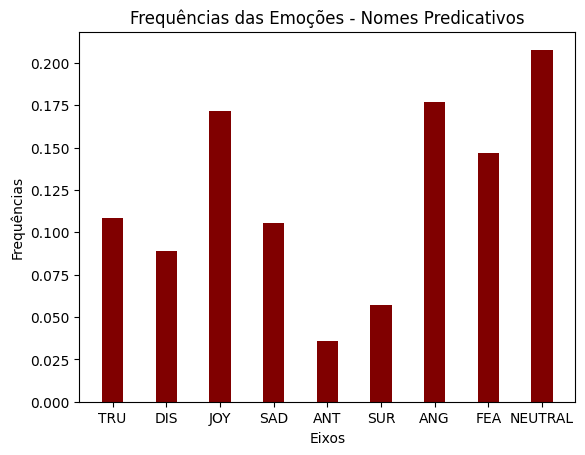

In [ ]:
plt.bar(colnames, emot_dims_npreds_rel, color='maroon', width=0.4)
plt.title('Frequências das Emoções - Nomes Predicativos')
plt.xlabel('Eixos')
plt.ylabel('Frequências')
plt.show()

In [ ]:
diff = emot_dims_npreds_rel - emot_dims_corpus_rel
diff

array([-0.07250735, -0.08279342,  0.04967591,  0.00551046, -0.0978157 ,
       -0.05457957,  0.11090602,  0.09825734,  0.037298  ])

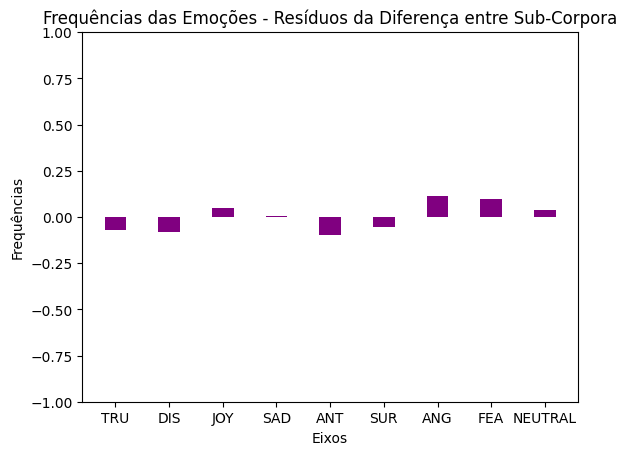

In [ ]:
plt.bar(colnames, diff, color='purple', width=0.4)
plt.title('Frequências das Emoções - Resíduos da Diferença entre Sub-Corpora')
plt.xlabel('Eixos')
plt.ylabel('Frequências')
plt.ylim([-1, 1])
plt.show()

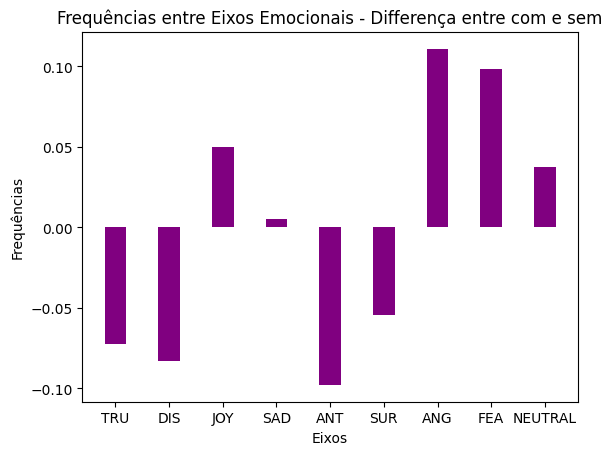

In [ ]:
plt.bar(colnames, diff, color='purple', width=0.4)
plt.title('Frequências entre Eixos Emocionais - ')
plt.xlabel('Eixos')
plt.ylabel('Frequências')
plt.show()

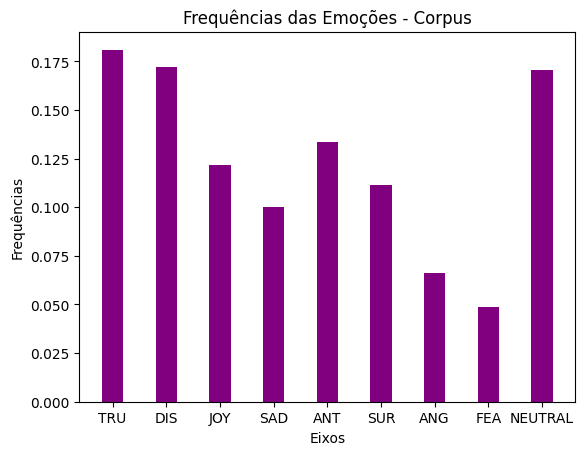

In [ ]:
plt.bar(colnames, emot_dims_corpus_rel, color='purple', width=0.4)
plt.title('Frequências das Emoções - Corpus')
plt.xlabel('Eixos')
plt.ylabel('Frequências')
plt.show()

In [ ]:
resid_abs_random_with_corpus = sample_random_dist - emot_dims_corpus
resid_abs_random_with_corpus

array([-261., -325.,  -85., -259., -212.,   24.,  -54.,   -9., -354.])

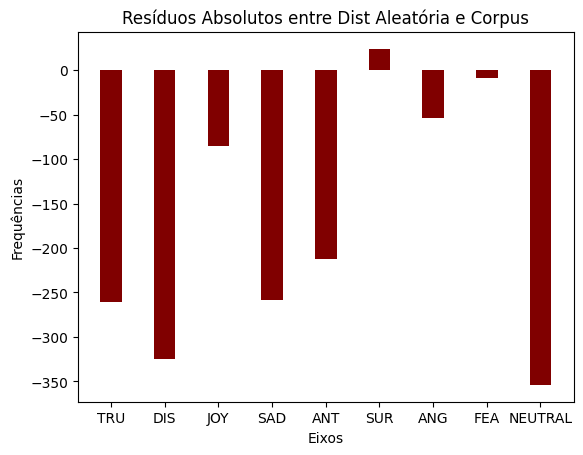

In [ ]:
plt.bar(colnames, resid_abs_random_with_corpus, color='maroon', width=0.4)
plt.title('Resíduos Absolutos entre Dist Aleatória e Corpus')
plt.xlabel('Eixos')
plt.ylabel('Frequências')
plt.show()

In [ ]:
resid_rel_random_with_corpus =  sample_random_dist_rel - emot_dims_corpus_rel
resid_rel_random_with_corpus

array([ 0.03527281, -0.02140869,  0.08821981, -0.06229825,  0.01210579,
        0.15384298,  0.04238353,  0.05328946, -0.04407245])

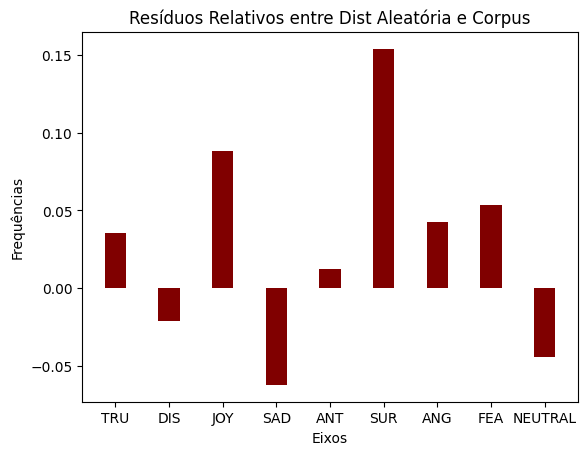

In [ ]:
plt.bar(colnames, resid_rel_random_with_corpus, color='maroon', width=0.4)
plt.title('Resíduos Relativos entre Dist Aleatória e Corpus')
plt.xlabel('Eixos')
plt.ylabel('Frequências')
plt.show()

In [ ]:
resid_abs_random_with_npreds =  sample_random_dist - emot_dims_npreds
resid_abs_random_with_npreds

array([ 151.,   86.,   54.,  -95.,  154.,  292.,  -96.,  -63., -114.])

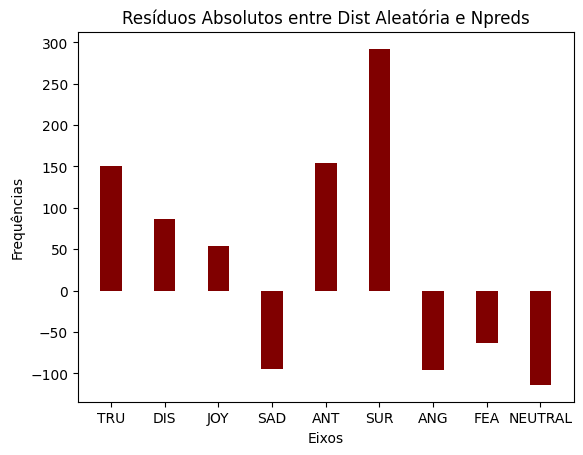

In [ ]:
plt.bar(colnames, resid_abs_random_with_npreds, color='maroon', width=0.4)
plt.title('Resíduos Absolutos entre Dist Aleatória e Npreds')
plt.xlabel('Eixos')
plt.ylabel('Frequências')
plt.show()

In [ ]:
resid_rel_random_with_npreds =  sample_random_dist_rel - emot_dims_npreds_rel
resid_rel_random_with_npreds

array([ 0.10778016,  0.06138473,  0.0385439 , -0.06780871,  0.10992148,
        0.20842256, -0.06852248, -0.04496788, -0.08137045])

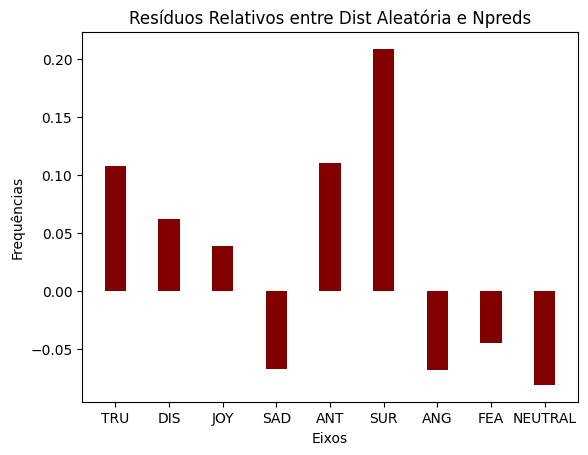

In [ ]:
plt.bar(colnames, resid_rel_random_with_npreds, color='maroon', width=0.4)
plt.title('Resíduos Relativos entre Dist Aleatória e Npreds')
plt.xlabel('Eixos')
plt.ylabel('Frequências')
plt.show()

In [ ]:
# download relevant dataframes

npreds_emot.to_csv('npreds_emot.csv')

In [ ]:
dante_emot_nonpred.to_csv('dante_nonpreds.csv')

## Bootstrapping e Teste de Kolmogorov-Smirnov

Queremos checar se as distribuições de frequencias de eixos emocionais diferem entre si (two-sample kolmogorov-smirnov test) e se cada uma delas difere significativamente da distribuição uniforme (one-sample kolmogorov-smirnov test)

### Bootstrapping

Vamos usar bootstrapping já que para o teste de Kolmogorov-Smirnov precisamos de uma distribuição contínua. Já que temos uma distribuição discreta, podemos usar bootstrapping para tentar recuperar a distribuição de probabilidade contínua dos dados à partir da distribuição empírica que encontramos. Isso envolverá reamostrar nossos dados com repetição N vezes, e calcular para cada nova amostra as frequências

### Kolmogorov-Smirnov Test

In [ ]:
from scipy import stats

In [ ]:
npred_emot_dims = npreds_emot.iloc[:, 2:11]
for i in range(npred_emot_dims.shape[0]):
  for j in range(npred_emot_dims.shape[1]):
    if npred_emot_dims.iloc[i, j] != 1:
      npred_emot_dims.iloc[i, j] = 0

In [ ]:
nonnpred_emot_dims = dante_emot_nonpred.iloc[:, 2:11]
for i in range(nonnpred_emot_dims.shape[0]):
  for j in range(nonnpred_emot_dims.shape[1]):
    if nonnpred_emot_dims.iloc[i, j] != 1:
      nonnpred_emot_dims.iloc[i, j] = 0

In [ ]:
stats.kstest(emot_dims_npreds_rel, emot_dims_corpus_rel)

KstestResult(statistic=0.2222222222222222, pvalue=0.9894693541752365, statistic_location=0.10849393290506781, statistic_sign=1)

In [ ]:
cont_table = pd.DataFrame({'npreds':emot_dims_npreds, 'corpus':emot_dims_corpus}, index=npred_emot_dims.columns)

In [ ]:
cont_table_array = cont_table.to_numpy()

In [ ]:
stats.chi2_contingency(cont_table_array)

Chi2ContingencyResult(statistic=459.3528713594857, pvalue=3.661629197395528e-94, dof=8, expected_freq=array([[221.23595506, 494.76404494],
       [204.24157303, 456.75842697],
       [191.26404494, 427.73595506],
       [142.13483146, 317.86516854],
       [143.98876404, 322.01123596],
       [132.24719101, 295.75280899],
       [140.28089888, 313.71910112],
       [110.61797753, 247.38202247],
       [253.98876404, 568.01123596]]))

In [ ]:
stats.chi2_contingency(cont_table_array.T)

Chi2ContingencyResult(statistic=459.3528713594856, pvalue=3.6616291973956323e-94, dof=8, expected_freq=array([[221.23595506, 204.24157303, 191.26404494, 142.13483146,
        143.98876404, 132.24719101, 140.28089888, 110.61797753,
        253.98876404],
       [494.76404494, 456.75842697, 427.73595506, 317.86516854,
        322.01123596, 295.75280899, 313.71910112, 247.38202247,
        568.01123596]]))